# <span style="color:blue">  Esercitazione 6</span>

In questa esercitazione viene simulato il modello di Ising unidimensionale sia con l'algoritmo di Metropolis che con l'algoritmo di Gibbs. Si calcolano quindi l'energia interna, il calore specifico, la suscettività magnetica e la magnetizzazione (se applicato un campo esterno) del modello e si confrontano i risultati con i risultati analitici del modello. 

## Esercizio 6.1

Viene preso in considerazione un modello di 50 spin. L'hamiltoniana è scritta come
$$
H = -J\sum_{ij}s_is_j - h\sum_is_i
$$
dove $J$ misura l'intensità dell'accoppiamento tra due spin mentre $h$ è l'intensità di un eventuale campo magnetico applicato esternamente. Per simulare il modello ad una temperatura si procede nel seguente modo:
1. La configurazione inziale è generata in maniera random disponendo gli spin in parte su (+1) e in parte giù (-1). Questa configurazione corrisponde ad un sistema di temperatura idealmente infinita.
2. Si seleziona casualmente un punto della catena $k$ e si propone un'inversione dello spin. Si calcola la corrispondente variazione di energia che ne consegue. Per $h=0$, questa è pari a
$$
\Delta E = -J\sum_{j\text{ near to }k}s_j(s_k^i-s_k^f) = 2Js_k^f\sum_{j\text{ near to }k}s_j
$$
dove la somma è estesa sui soli spin adiacenti allo spin $k$-esimo e $i,f$ indicano lo stato iniziale e finale dello spin $k$-esimo rispettivamente. Altrimenti, per $h\neq0$, si ha
$$
\Delta E = 2s_k^f\Big(J\sum_{j\text{ near to }k}s_j+h\Big)
$$
4. Se $\Delta E\leq0$, allora si è generata una configurazione energeticamente favorevole, quindi l'inversione dello spin viene accettata con probabilità 1. Viceversa, se $\Delta E>0$, allora per l'algoritmo di Metropolis la mossa viene accettata con probabilità $e^{-\beta\Delta E}$.
5. I punti precedenti vengono ripetuti per un numero adeguato di volte in maniera che il sistema si porti all'equilibrio termodinamico. Questo numero è preso pari al numero stesso di spin del sistema.

Lo scopo è quello di simulare diverse temperature e per ciascuna di queste misurare le proprietà del sistema. Tuttavia, è necessario equilibrare il sistema prima di iniziare a misurarne le proprietà. Infatti, la configurazione iniziale è generata a temperatura infinita e ogni volta che si procede a simulare una temperatura successiva si riparte dalla configurazione corrispondente alla temperatura precedente. Pertanto, ha senso partire dalla temperatura più alta da simulare e progressivamente raffreddare il sistema per simulare le temperature più basse. Ad ogni cambio di temperatura si eseguono alcuni step di equilibrazione (nel nostro caso si sono posti in numero di $10^5$). 

Una volta che il sistema è stato equilibrato, si continuano a proporre nuove mosse sugli spin per generare configurazioni sempre differenti. Per ogni configurazione generata se ne calcolano le proprietà quali energia interna, calore specifico, suscettività e magnetizzazione. Queste vengono poi calcolate con la media a blocchi. In tal senso si sono scelti 20 blocchi da $10^5$ configurazioni ciascuno.

Quanto descritto sopra considera la proposta delle mosse sugli spin con l'algoritmo di Metropolis. Alternativamente, si è anche simulato il sistema proponendo le mosse con l'algoritmo di Gibbs. Questo prevede che ogni valore dello spin sia ottenuto a partire dalla probabilità condizionata data la configurazione degli spin adiacenti. Si confrontato quindi i risultati ottenuti sia con Metropolis che con Gibbs.

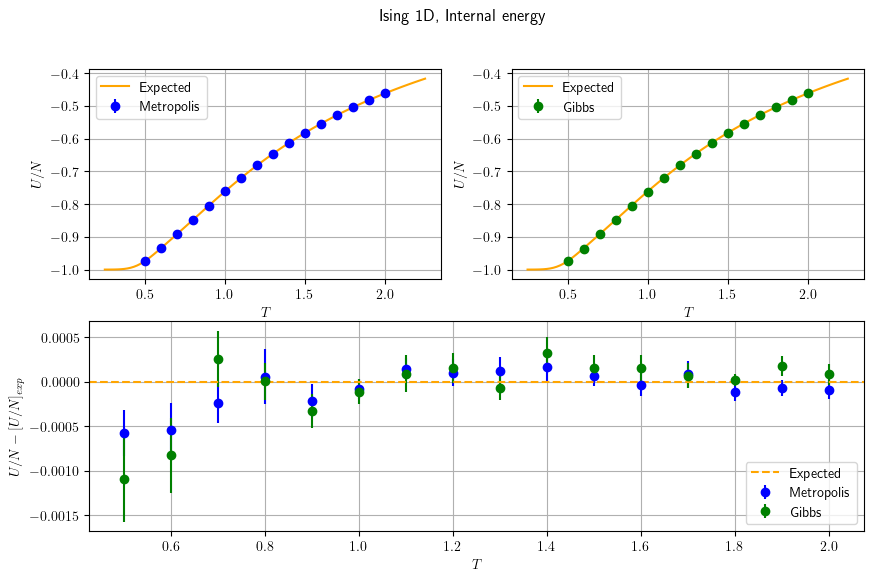

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati
data1 = np.loadtxt("temp_total_energy_metro.dat", skiprows=1)
data2 = np.loadtxt("temp_total_energy_gibbs.dat", skiprows=1)

# Plot grafico
fig = plt.figure(figsize=(10, 6))
plt.rcParams['text.usetex'] = True
fig.suptitle('Ising 1D, Internal energy')

# Alcunte temperature per disegnare curva modello analitico
points=100
T = np.linspace(0.25,2.25,num=points)
temp = np.array([2.0,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5])

# Definizione energia interna modello analitico
def energy(temperature):
    beta = 1/temperature
    J = 1.0
    Ns = 50
    th = np.tanh(beta * J)
    thN = th ** Ns
    ch = 1 / th
    energy = -J * (th + ch * thN) / (1 + thN)
    return energy

# Grafico in alto a sx: confronto con Metropolis
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(T, energy(T), c='orange', label='Expected')
ax1.errorbar(data1[:,0], data1[:,1], yerr=data1[:,2], c='blue', fmt="o", label='Metropolis')

ax1.set_xlabel('$T$')
ax1.set_ylabel('$U/N$')
ax1.legend()
ax1.grid(True)

# Grafico in alto a dx: confronto con Gibbs
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(T, energy(T), c='orange', label='Expected')
ax2.errorbar(data2[:,0], data2[:,1], yerr=data2[:,2], c='green', fmt="o", label='Gibbs')

ax2.set_xlabel('$T$')
ax2.set_ylabel('$U/N$')
ax2.legend()
ax2.grid(True)

# Grafico in basso: residui rispetto a modello analitico
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.errorbar(data1[:,0], data1[:,1]-energy(temp), yerr=data1[:,2], c='blue', fmt="o", label='Metropolis')
ax3.errorbar(data2[:,0], data2[:,1]-energy(temp), yerr=data2[:,2], c='green', fmt="o", label='Gibbs')
ax3.axhline(0, c='orange', linestyle='--', label='Expected')

ax3.set_xlabel('$T$')
ax3.set_ylabel('$U/N-[U/N]_{exp}$')
ax3.legend(loc='lower right')
ax3.grid(True)

plt.show()

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

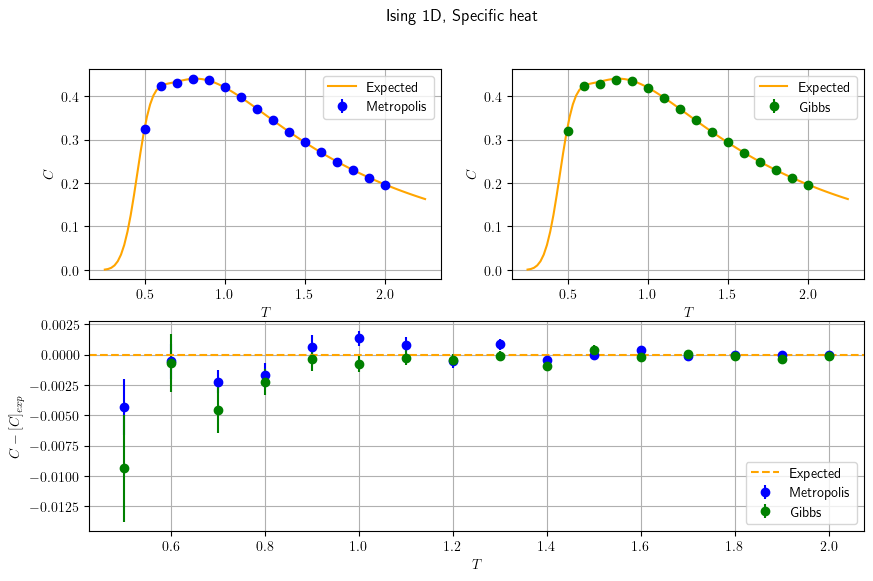

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati
data1 = np.loadtxt("temp_specific_heat_metro.dat", skiprows=1)
data2 = np.loadtxt("temp_specific_heat_gibbs.dat", skiprows=1)

# Plot grafico
fig = plt.figure(figsize=(10, 6))
plt.rcParams['text.usetex'] = True
fig.suptitle('Ising 1D, Specific heat')

# Alcunte temperature per disegnare curva modello analitico
points=100
T = np.linspace(0.25,2.25,num=points)
temp = np.array([2.0,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5])

# Definizione calore specifico modello analitico
def heat(temperature):
    beta = 1/temperature
    J = 1.0
    Ns = 50
    th = np.tanh(beta * J)
    thN = th ** Ns
    ch = 1 / th
    heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
    return heat

# Grafico in alto a sx: confronto con Metropolis
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(T, heat(T), c='orange', label='Expected')
ax1.errorbar(data1[:,0], data1[:,1], yerr=data1[:,2], c='blue', fmt="o", label='Metropolis')

ax1.set_xlabel('$T$')
ax1.set_ylabel('$C$')
ax1.legend()
ax1.grid(True)

# Grafico in alto a dx: confronto con Gibbs
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(T, heat(T), c='orange', label='Expected')
ax2.errorbar(data2[:,0], data2[:,1], yerr=data2[:,2], c='green', fmt="o", label='Gibbs')

ax2.set_xlabel('$T$')
ax2.set_ylabel('$C$')
ax2.legend()
ax2.grid(True)

# Grafico in basso: residui rispetto a modello analitico
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.errorbar(data1[:,0], data1[:,1]-heat(temp), yerr=data1[:,2], c='blue', fmt="o", label='Metropolis')
ax3.errorbar(data2[:,0], data2[:,1]-heat(temp), yerr=data2[:,2], c='green', fmt="o", label='Gibbs')
ax3.axhline(0, c='orange', linestyle='--', label='Expected')

ax3.set_xlabel('$T$')
ax3.set_ylabel('$C-[C]_{exp}$')
ax3.legend(loc='lower right')
ax3.grid(True)

plt.show()

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} \underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

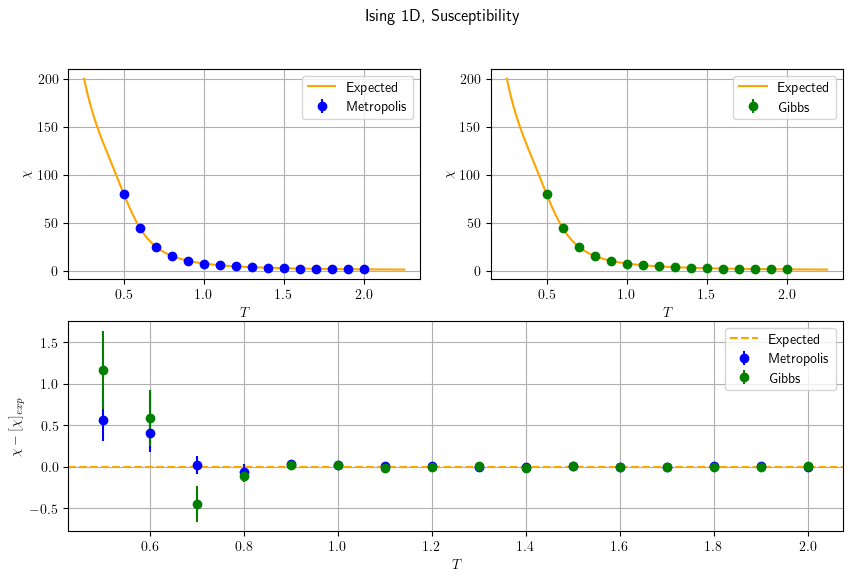

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati
data1 = np.loadtxt("temp_susceptibility_metro.dat", skiprows=1)
data2 = np.loadtxt("temp_susceptibility_gibbs.dat", skiprows=1)

# Plot grafico
fig = plt.figure(figsize=(10, 6))
plt.rcParams['text.usetex'] = True
fig.suptitle('Ising 1D, Susceptibility')

# Alcunte temperature per disegnare curva modello analitico
points=100
T = np.linspace(0.25,2.25,num=points)
temp = np.array([2.0,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5])

# Definizione suscettività modello analitico
def chi(temperature):
    beta = 1/temperature
    J = 1.0
    Ns = 50
    th = np.tanh(beta * J)
    thN = th ** Ns
    chi = beta * np.exp(2 * beta * J) * (1 - thN) / (1 + thN)
    return chi

# Grafico in alto a sx: confronto con Metropolis
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(T, chi(T), c='orange', label='Expected')
ax1.errorbar(data1[:,0], data1[:,1], yerr=data1[:,2], c='blue', fmt="o", label='Metropolis')

ax1.set_xlabel('$T$')
ax1.set_ylabel('$\chi$')
ax1.legend()
ax1.grid(True)

# Grafico in alto a dx: confronto con Gibbs
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(T, chi(T), c='orange', label='Expected')
ax2.errorbar(data2[:,0], data2[:,1], yerr=data2[:,2], c='green', fmt="o", label='Gibbs')

ax2.set_xlabel('$T$')
ax2.set_ylabel('$\chi$')
ax2.legend()
ax2.grid(True)

# Grafico in basso: residui rispetto a modello analitico
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.errorbar(data1[:,0], data1[:,1]-chi(temp), yerr=data1[:,2], c='blue', fmt="o", label='Metropolis')
ax3.errorbar(data2[:,0], data2[:,1]-chi(temp), yerr=data2[:,2], c='green', fmt="o", label='Gibbs')
ax3.axhline(0, c='orange', linestyle='--', label='Expected')

ax3.set_xlabel('$T$')
ax3.set_ylabel('$\chi-[\chi]_{exp}$')
ax3.legend(loc='upper right')
ax3.grid(True)

plt.show()

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} \underset{h=0}=
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

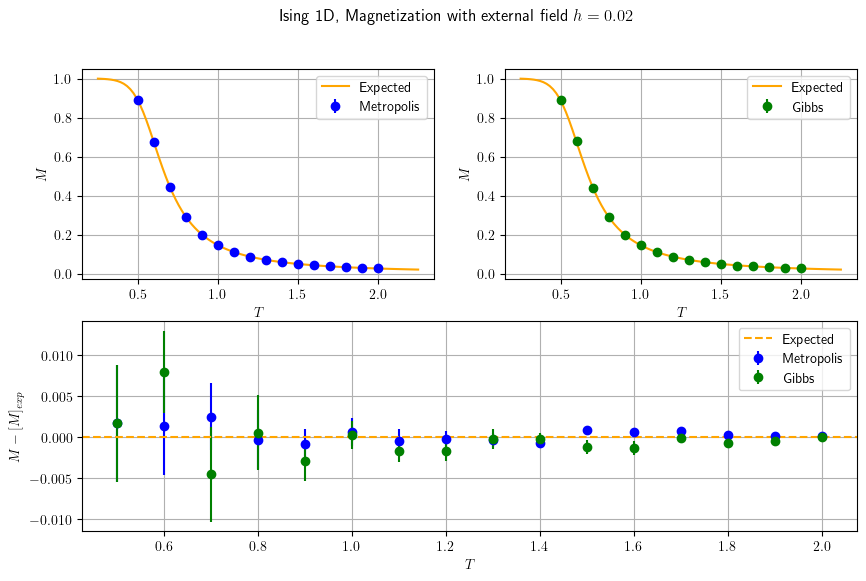

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati
data1 = np.loadtxt("temp_magnetization_metro.dat", skiprows=1)
data2 = np.loadtxt("temp_magnetization_gibbs.dat", skiprows=1)

# Plot grafico
fig = plt.figure(figsize=(10, 6))
plt.rcParams['text.usetex'] = True
fig.suptitle('Ising 1D, Magnetization with external field $h=0.02$')

# Alcunte temperature per disegnare curva modello analitico
points=100
T = np.linspace(0.25,2.25,num=points)
temp = np.array([2.0,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5])

# Definizione magnetizzazione modello analitico
def magnet(temperature):
    b = 1/temperature
    J = 1.0
    Ns = 50
    h = 0.02
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    return M

# Grafico in alto a sx: confronto con Metropolis
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(T, magnet(T), c='orange', label='Expected')
ax1.errorbar(data1[:,0], data1[:,1], yerr=data1[:,2], c='blue', fmt="o", label='Metropolis')

ax1.set_xlabel('$T$')
ax1.set_ylabel('$M$')
ax1.legend()
ax1.grid(True)

# Grafico in alto a dx: confronto con Gibbs
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(T, magnet(T), c='orange', label='Expected')
ax2.errorbar(data2[:,0], data2[:,1], yerr=data2[:,2], c='green', fmt="o", label='Gibbs')

ax2.set_xlabel('$T$')
ax2.set_ylabel('$M$')
ax2.legend()
ax2.grid(True)

# Grafico in basso: residui rispetto a modello analitico
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.errorbar(data1[:,0], data1[:,1]-magnet(temp), yerr=data1[:,2], c='blue', fmt="o", label='Metropolis')
ax3.errorbar(data2[:,0], data2[:,1]-magnet(temp), yerr=data2[:,2], c='green', fmt="o", label='Gibbs')
ax3.axhline(0, c='orange', linestyle='--', label='Expected')

ax3.set_xlabel('$T$')
ax3.set_ylabel('$M-[M]_{exp}$')
ax3.legend(loc='upper right')
ax3.grid(True)

plt.show()

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$